In [1]:
!pip install -q numpy
!pip install -q scipy
!pip install -q matplotlib
!pip install -q pandas
!pip install -q sympy

In [2]:
dictData = {
    "StreamNo":[1,2,3,4],
    "Type":['cold', 'hot', 'cold', 'hot'],
    "CP":[2.0,3.0,4.0,1.5],
    "Ts":[20,180,80,160],
    "Tt":[145,60,150,30],
}

dictData

{'StreamNo': [1, 2, 3, 4],
 'Type': ['cold', 'hot', 'cold', 'hot'],
 'CP': [2.0, 3.0, 4.0, 1.5],
 'Ts': [20, 180, 80, 160],
 'Tt': [145, 60, 150, 30]}

In [3]:
import pandas as pd

df = pd.DataFrame(dictData)
df

,StreamNo,Type,CP,Ts,Tt
0,1,cold,2.0,20,145
1,2,hot,3.0,180,60
2,3,cold,4.0,80,150
3,4,hot,1.5,160,30


In [4]:
df['dH'] = (df['CP'] * (df['Ts'] - df['Tt'])).abs()
df['Hs'] = (df['CP'] * df['Ts']).abs()
df['Ht'] = (df['CP'] * df['Tt']).abs()
df

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
0,1,cold,2.0,20,145,250.0,40.0,290.0
1,2,hot,3.0,180,60,360.0,540.0,180.0
2,3,cold,4.0,80,150,280.0,320.0,600.0
3,4,hot,1.5,160,30,195.0,240.0,45.0


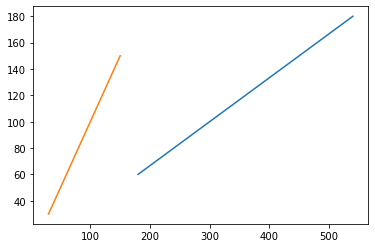

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()

x = [540,180]
y = [180,60]
plt.plot(x,y, label='s1')

x = [150, 30]
y = [150, 30]
plt.plot(x, y, label='s2')

plt.show()

In [6]:
dT = 10;
iT = dT/2;

(dT, iT)

(10, 5.0)

In [7]:
dfHot = df[df['Type']=='hot']
dfHot

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
1,2,hot,3.0,180,60,360.0,540.0,180.0
3,4,hot,1.5,160,30,195.0,240.0,45.0


In [8]:
yh = dfHot[['Ts','Tt']] - iT
yh

,Ts,Tt
1,175.0,55.0
3,155.0,25.0


In [9]:
dfCold = df[df['Type']=='cold']
dfCold

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
0,1,cold,2.0,20,145,250.0,40.0,290.0
2,3,cold,4.0,80,150,280.0,320.0,600.0


In [10]:
yc = dfCold[['Ts','Tt']] + iT
yc

,Ts,Tt
0,25.0,150.0
2,85.0,155.0


In [11]:
dfHC = pd.concat([yh, yc])
dfHC

,Ts,Tt
1,175.0,55.0
3,155.0,25.0
0,25.0,150.0
2,85.0,155.0


In [12]:
df[['iTs','iTt']] = dfHC
df

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht,iTs,iTt
0,1,cold,2.0,20,145,250.0,40.0,290.0,25.0,150.0
1,2,hot,3.0,180,60,360.0,540.0,180.0,175.0,55.0
2,3,cold,4.0,80,150,280.0,320.0,600.0,85.0,155.0
3,4,hot,1.5,160,30,195.0,240.0,45.0,155.0,25.0


In [13]:
dfHot

,StreamNo,Type,CP,Ts,Tt,dH,Hs,Ht
1,2,hot,3.0,180,60,360.0,540.0,180.0
3,4,hot,1.5,160,30,195.0,240.0,45.0


In [14]:
dfs = df[['StreamNo','Type','CP','Ts']]
dfs.columns = ['StreamNo','Type','CP','iT']
dfs

,StreamNo,Type,CP,iT
0,1,cold,2.0,20
1,2,hot,3.0,180
2,3,cold,4.0,80
3,4,hot,1.5,160


In [15]:
dft = df[['StreamNo','Type','CP','Tt']]
dft.columns = ['StreamNo','Type','CP','iT']
dft

,StreamNo,Type,CP,iT
0,1,cold,2.0,145
1,2,hot,3.0,60
2,3,cold,4.0,150
3,4,hot,1.5,30


In [16]:
dfPT = pd.concat([dfs,dft], axis=0)
dfPT

,StreamNo,Type,CP,iT
0,1,cold,2.0,20
1,2,hot,3.0,180
2,3,cold,4.0,80
3,4,hot,1.5,160
0,1,cold,2.0,145
1,2,hot,3.0,60
2,3,cold,4.0,150
3,4,hot,1.5,30


In [17]:
dfPT = dfPT.sort_values(by="iT", ascending=False)
dfPT['dH'] = dfPT['CP'] * dfPT['iT']
dfPT

,StreamNo,Type,CP,iT,dH
1,2,hot,3.0,180,540.0
3,4,hot,1.5,160,240.0
2,3,cold,4.0,150,600.0
0,1,cold,2.0,145,290.0
2,3,cold,4.0,80,320.0
1,2,hot,3.0,60,180.0
3,4,hot,1.5,30,45.0
0,1,cold,2.0,20,40.0


In [18]:
dfPT[['CPh','CPc']] = 0.0
dfPT

,StreamNo,Type,CP,iT,dH,CPh,CPc
1,2,hot,3.0,180,540.0,0.0,0.0
3,4,hot,1.5,160,240.0,0.0,0.0
2,3,cold,4.0,150,600.0,0.0,0.0
0,1,cold,2.0,145,290.0,0.0,0.0
2,3,cold,4.0,80,320.0,0.0,0.0
1,2,hot,3.0,60,180.0,0.0,0.0
3,4,hot,1.5,30,45.0,0.0,0.0
0,1,cold,2.0,20,40.0,0.0,0.0


In [19]:
dfPT = dfPT.reset_index(drop=True)
dfPT


,StreamNo,Type,CP,iT,dH,CPh,CPc
0,2,hot,3.0,180,540.0,0.0,0.0
1,4,hot,1.5,160,240.0,0.0,0.0
2,3,cold,4.0,150,600.0,0.0,0.0
3,1,cold,2.0,145,290.0,0.0,0.0
4,3,cold,4.0,80,320.0,0.0,0.0
5,2,hot,3.0,60,180.0,0.0,0.0
6,4,hot,1.5,30,45.0,0.0,0.0
7,1,cold,2.0,20,40.0,0.0,0.0


In [20]:
dfHot = dfPT[dfPT['Type']=='hot'].copy()
dfHot

,StreamNo,Type,CP,iT,dH,CPh,CPc
0,2,hot,3.0,180,540.0,0.0,0.0
1,4,hot,1.5,160,240.0,0.0,0.0
5,2,hot,3.0,60,180.0,0.0,0.0
6,4,hot,1.5,30,45.0,0.0,0.0


In [21]:
dfHotUniq = dfHot.drop_duplicates(subset=['StreamNo'])
dfHotUniq

,StreamNo,Type,CP,iT,dH,CPh,CPc
0,2,hot,3.0,180,540.0,0.0,0.0
1,4,hot,1.5,160,240.0,0.0,0.0


In [22]:
for i,v in dfHotUniq.iterrows():
    s = v['StreamNo']
    sCP = v['CP']
    iS = list(dfHot[dfHot['StreamNo']==s].index)
    print('s:', s, 'sCP:', sCP, 'iS:', iS, '--')
    dfHot.loc[iS[0]+1:iS[1], ["CPh"]] = dfHot.loc[iS[0]:iS[1], ["CPh"]] +sCP
    print(dfHot)
    # dfPT.loc[dfHot.loc[iS[0]:iS[1]].index,['CPh']] = dfPT.loc[dfHot.loc[iS[0]:iS[1]].index,['CPh']] + sCP
    # dfPT.loc[dfHot.loc[iS[0]:iS[1]].index,['iCP']] = dfPT.loc[dfHot.loc[iS[0]:iS[1]].index,['iCP']] + sCP

dfHot

s: 2 sCP: 3.0 iS: [0, 5] --
   StreamNo Type   CP   iT     dH  CPh  CPc
0         2  hot  3.0  180  540.0  0.0  0.0
1         4  hot  1.5  160  240.0  3.0  0.0
5         2  hot  3.0   60  180.0  3.0  0.0
6         4  hot  1.5   30   45.0  0.0  0.0
s: 4 sCP: 1.5 iS: [1, 6] --
   StreamNo Type   CP   iT     dH  CPh  CPc
0         2  hot  3.0  180  540.0  0.0  0.0
1         4  hot  1.5  160  240.0  3.0  0.0
5         2  hot  3.0   60  180.0  4.5  0.0
6         4  hot  1.5   30   45.0  1.5  0.0


,StreamNo,Type,CP,iT,dH,CPh,CPc
0,2,hot,3.0,180,540.0,0.0,0.0
1,4,hot,1.5,160,240.0,3.0,0.0
5,2,hot,3.0,60,180.0,4.5,0.0
6,4,hot,1.5,30,45.0,1.5,0.0


In [23]:
dfHot['diTh'] = -dfHot['iT'].diff()
dfHot['diTh'].iat[0] = 0
dfHot['diHh'] = dfHot['CPh']*dfHot['diTh']
# dfHot['iHh'] = dfHot['diHh']
# dfHot['iHh'].iat[0] = dfHot['dH'].iat[0]

dfHot

,StreamNo,Type,CP,iT,dH,CPh,CPc,diTh,diHh
0,2,hot,3.0,180,540.0,0.0,0.0,0.0,0.0
1,4,hot,1.5,160,240.0,3.0,0.0,20.0,60.0
5,2,hot,3.0,60,180.0,4.5,0.0,100.0,450.0
6,4,hot,1.5,30,45.0,1.5,0.0,30.0,45.0


In [24]:
dfHot = dfHot.sort_index(ascending=False)
dfHot['diHh'] = dfHot['diHh'].shift()
dfHot['diHh'].iat[0] = dfHot['dH'].iat[0]
dfHot['iHh'] = dfHot['diHh'].cumsum()
dfHot = dfHot.sort_index()

dfHot

,StreamNo,Type,CP,iT,dH,CPh,CPc,diTh,diHh,iHh
0,2,hot,3.0,180,540.0,0.0,0.0,0.0,60.0,600.0
1,4,hot,1.5,160,240.0,3.0,0.0,20.0,450.0,540.0
5,2,hot,3.0,60,180.0,4.5,0.0,100.0,45.0,90.0
6,4,hot,1.5,30,45.0,1.5,0.0,30.0,45.0,45.0


In [25]:
dfCold = dfPT[dfPT['Type']=='cold'].copy()
dfCold

,StreamNo,Type,CP,iT,dH,CPh,CPc
2,3,cold,4.0,150,600.0,0.0,0.0
3,1,cold,2.0,145,290.0,0.0,0.0
4,3,cold,4.0,80,320.0,0.0,0.0
7,1,cold,2.0,20,40.0,0.0,0.0


In [26]:
dfColdUniq = dfCold.drop_duplicates(subset=['StreamNo'])
dfColdUniq

,StreamNo,Type,CP,iT,dH,CPh,CPc
2,3,cold,4.0,150,600.0,0.0,0.0
3,1,cold,2.0,145,290.0,0.0,0.0


In [27]:
for i,v in dfColdUniq.iterrows():
    s = v['StreamNo']
    sCP = v['CP']
    iS = list(dfCold[dfCold['StreamNo']==s].index)
    print('s:', s, 'sCP:', sCP, 'iS:', iS, '--')
    dfCold.loc[iS[0]+1:iS[1], ["CPc"]] = dfCold.loc[iS[0]:iS[1], ["CPc"]] +sCP
    # dfPT.loc[dfCold.loc[iS[0]:iS[1]].index,['CPc']] = dfPT.loc[dfCold.loc[iS[0]:iS[1]].index,['CPc']] + sCP
    # dfPT.loc[dfCold.loc[iS[0]:iS[1]].index,['iCP']] = dfPT.loc[dfCold.loc[iS[0]:iS[1]].index,['iCP']] + sCP

dfCold

s: 3 sCP: 4.0 iS: [2, 4] --
s: 1 sCP: 2.0 iS: [3, 7] --


,StreamNo,Type,CP,iT,dH,CPh,CPc
2,3,cold,4.0,150,600.0,0.0,0.0
3,1,cold,2.0,145,290.0,0.0,4.0
4,3,cold,4.0,80,320.0,0.0,6.0
7,1,cold,2.0,20,40.0,0.0,2.0


In [28]:
dfCold['diTc'] = -dfCold['iT'].diff()
dfCold['diTc'].iat[0] = 0
dfCold['diHc'] = dfCold['CPc']*dfCold['diTc']

dfCold

,StreamNo,Type,CP,iT,dH,CPh,CPc,diTc,diHc
2,3,cold,4.0,150,600.0,0.0,0.0,0.0,0.0
3,1,cold,2.0,145,290.0,0.0,4.0,5.0,20.0
4,3,cold,4.0,80,320.0,0.0,6.0,65.0,390.0
7,1,cold,2.0,20,40.0,0.0,2.0,60.0,120.0


In [29]:
dfCold = dfCold.sort_index(ascending=False)
dfCold['diHc'] = dfCold['diHc'].shift()
dfCold['diHc'].iat[0] = dfCold['dH'].iat[0]
dfCold['iHc'] = dfCold['diHc'].cumsum()
dfCold = dfCold.sort_index()

dfCold

,StreamNo,Type,CP,iT,dH,CPh,CPc,diTc,diHc,iHc
2,3,cold,4.0,150,600.0,0.0,0.0,0.0,20.0,570.0
3,1,cold,2.0,145,290.0,0.0,4.0,5.0,390.0,550.0
4,3,cold,4.0,80,320.0,0.0,6.0,65.0,120.0,160.0
7,1,cold,2.0,20,40.0,0.0,2.0,60.0,40.0,40.0


In [30]:
dfHot

,StreamNo,Type,CP,iT,dH,CPh,CPc,diTh,diHh,iHh
0,2,hot,3.0,180,540.0,0.0,0.0,0.0,60.0,600.0
1,4,hot,1.5,160,240.0,3.0,0.0,20.0,450.0,540.0
5,2,hot,3.0,60,180.0,4.5,0.0,100.0,45.0,90.0
6,4,hot,1.5,30,45.0,1.5,0.0,30.0,45.0,45.0


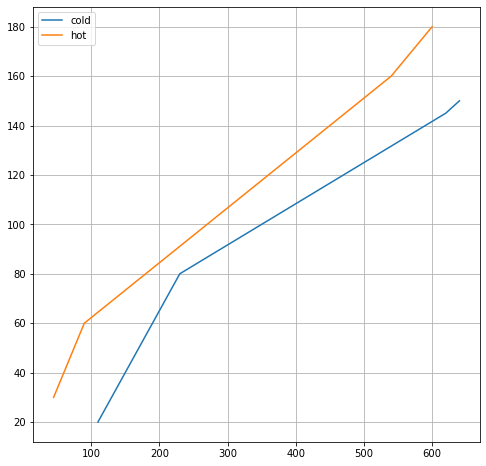

In [40]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))


xc=dfCold['iHc']+70
yc=dfCold['iT']
plt.plot(xc, yc, label='cold')

xh=dfHot['iHh']
yh=dfHot['iT']
plt.plot(xh, yh, label='hot')

plt.grid(True)
plt.legend()

plt.show()

In [41]:
print(list(xh))
print(list(yh))
print(list(xc))
print(list(yc))

[600.0, 540.0, 90.0, 45.0]
[180, 160, 60, 30]
[640.0, 620.0, 230.0, 110.0]
[150, 145, 80, 20]


In [42]:
225-105

120

In [43]:
def areaOfTrape(b1,b2,h):
    return 1.0/2.0*(b1+b2)*h

In [44]:
areaOfTrape(38,9,120)

2820.0

In [45]:
b1=89-80
b2=160-135
h = 540-225
areaOfTrape(b1,b2,h)

5355.0

In [ ]:
b1=89-80
b2=160-135
h = 540-225
areaOfTrape(b1,b2,h)

In [46]:
b1 = 160-135 
b2 = 180-144 
h = 540 - 225

print(b1, b2, h)
areaOfTrape(b1,b2,h)

25 36 315


9607.5